### Linear Regression
If I have a x, what should be it's y?

- We want to model:
$$
h_{\Theta}(x) = Xw + b
$$
We need to find adapt weights($\Theta^{T}$) and bias($\Theta_{0}$)

- Loss Function:
$$
J(\Theta_{0},\Theta_{1}) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{\Theta}(x^{i}) - \^{y}^{i}) ^ {2}
$$
Here $h_{\Theta}(x^{i})$ represents the hypothesis 0 on $x^{i}$ and the $\^{y}$ is the ground truth

- A clear method is to use gradient descent: Start with random $\Theta$, change the values of it to reduce ${L}, update to repreat next cycle
$$
\Theta_{j} = \Theta_{j} - \alpha \frac{d}{d\Theta_{j}}{J(\Theta_{0},\Theta_{1})}
$$
Note that we need first calculate all the new $\Theta$ and then substitute then in
$\alpha$ is the learning rate
- Applying on the Linear regression (substituting the $J(\Theta_{0},\Theta_{1})$) and the derivative
$$
\Theta_{j} = \Theta_{j} - \alpha \frac{1}{m} \sum_{i = 1}^{m} ((h_{\Theta}(x^{i}) - \^{y}^{i}) ^ {2}) x_{j}
$$
For $\Theta_{j}$ the $x$ would be 1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegressionA:
    def __init__(self,alpha,iter):
        self.alpha = alpha
        self.iter = iter
        self.w = None
        self.b = None

        self.losses = []
    
    def fit(self,X,y):
        n_sample, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iter):
            y_pred = np.dot(X,self.w) + self.b # H0

            # Gradients
            dw = (2/n_sample) * np.dot(X.T, (y_pred - y))
            db = (2/n_sample) * np.sum(y_pred - y) # Since we don't multiply the x0

            # Update
            self.w -= self.alpha * dw 
            self.b -= self.alpha * db

            # compute and save MSE loss
            loss = np.mean((y_pred - y) ** 2)
            self.losses.append(loss)

    def predict(self,X):
        return np.dot(X,self.w) + self.b

Weight: [1.99518035]
Bias: 0.017400463340610635
Predictions: [2.01258081 4.00776116 6.00294152 7.99812187 9.99330222]


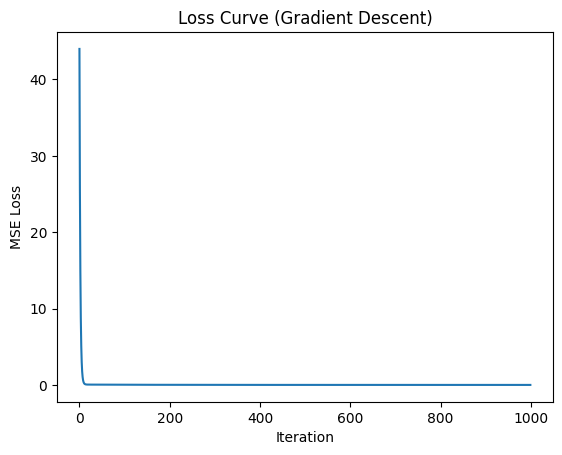

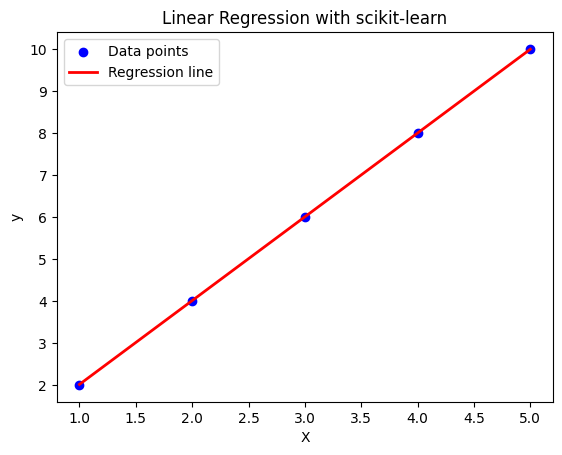

In [16]:
# A test example could be:

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

model = LinearRegressionA(alpha=0.01,iter=1000)
model.fit(X,y)

print("Weight:", model.w)
print("Bias:", model.b)

preds = model.predict(X)
print("Predictions:", preds)

plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Gradient Descent)")
plt.show()

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, preds, color="red", linewidth=2, label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()

From the graph we can see that after near 10 iterations the Loss goes down near 0, so reducing the iteration can save a lot of computational waste and achieving same results

Weight: [1.92761106]
Bias: 0.2613470483407793
Predictions: [2.18895811 4.11656916 6.04418022 7.97179128 9.89940234]


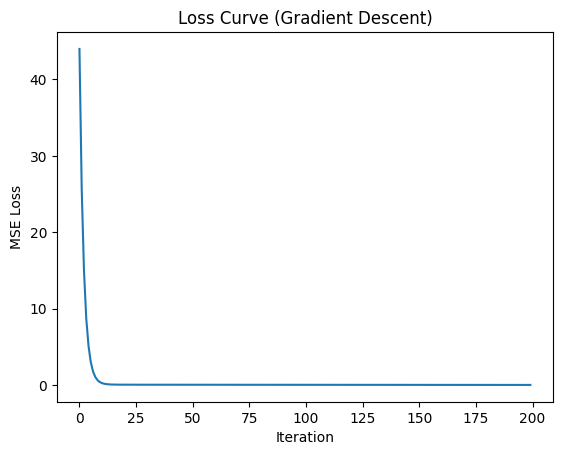

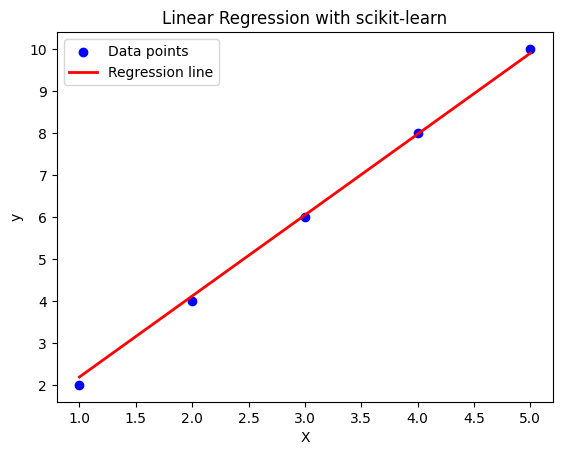

In [17]:
# A test example could be:

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

model = LinearRegressionA(alpha=0.01,iter=200) # 200 iterations
model.fit(X,y)

print("Weight:", model.w)
print("Bias:", model.b)

preds = model.predict(X)
print("Predictions:", preds)

plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Gradient Descent)")
plt.show()

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, preds, color="red", linewidth=2, label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()

Weight (slope): [2.]
Bias (intercept): 0.0
Predictions: [ 2.  4.  6.  8. 10.]


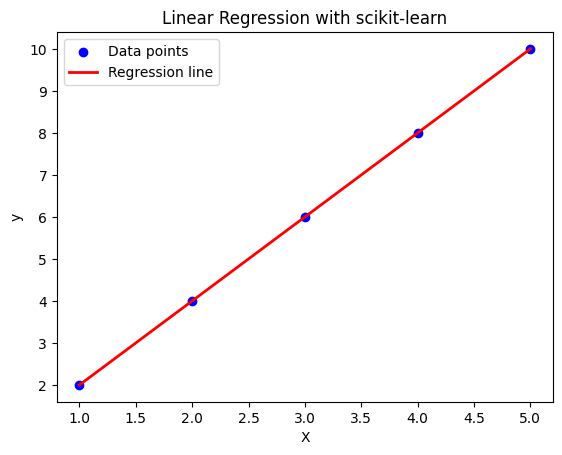

In [ ]:
# Using sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = np.array([[1], [2], [3], [4], [5]])  # must be 2D
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Parameters
print("Weight (slope):", model.coef_)
print("Bias (intercept):", model.intercept_)

# Predictions
y_pred = model.predict(X)
print("Predictions:", y_pred)

# Plot regression line
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()

- We can let the learning rate decay, taking more smaller steps
$$
\alpha_{t} = \frac{\alpha_{0}}{1+decay*n_{i}}
$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegressionB:
    def __init__(self,alpha,iter,decay):
        self.alpha = alpha
        self.iter = iter
        self.decay = decay
        self.w = None
        self.b = None

        self.losses = []
    
    def fit(self,X,y):
        n_sample, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for t in range(self.iter):
            y_pred = np.dot(X,self.w) + self.b # H0

            # Gradients
            dw = (2/n_sample) * np.dot(X.T, (y_pred - y))
            db = (2/n_sample) * np.sum(y_pred - y) # Since we don't multiply the x0

            alpha_t = self.alpha / (1 + self.decay * t)

            # Update
            self.w -= alpha_t * dw 
            self.b -= alpha_t * db

            # compute and save MSE loss
            loss = np.mean((y_pred - y) ** 2)
            self.losses.append(loss)

    def predict(self,X):
        return np.dot(X,self.w) + self.b

Weight: [1.99669716]
Bias: 0.01192429905398549


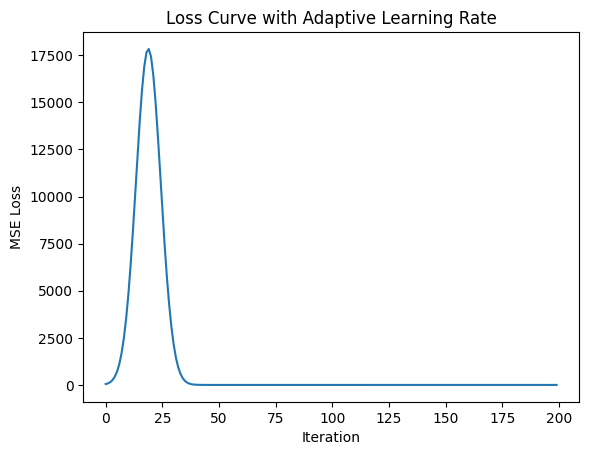

[2.00862146 4.00531862 6.00201578 7.99871294 9.9954101 ]


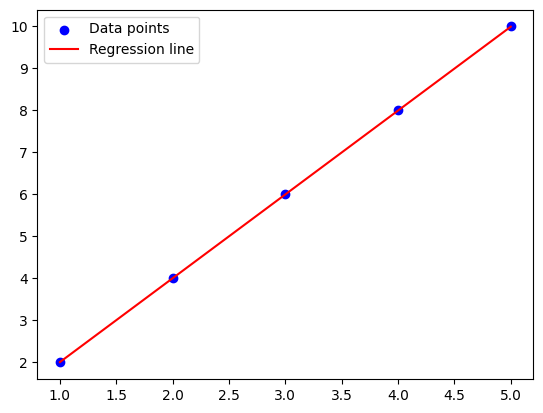

In [ ]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Train with adaptive learning rate
model = LinearRegressionB(alpha=0.1, iter=200, decay=0.01) # 200 iteration
model.fit(X, y)

print("Weight:", model.w)
print("Bias:", model.b)

# Plot loss curve
plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Curve with Adaptive Learning Rate")
plt.show()

# Plot regression line
y_pred = model.predict(X)
print(y_pred)
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.legend()
plt.show()
